<a href="https://colab.research.google.com/github/pepek1910/LearnKeras/blob/master/ImageToolsClassifierFromDysk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.youtube.com/watch?v=u2TjZzNuly8

In [ ]:
import os

shape_dir = os.path.join('/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingData/shape')
triangle_dir = os.path.join('/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingData/triangle')
wrench_dir = os.path.join('/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingData/wrench')

print('total training shape images:', len(os.listdir(shape_dir)))
print('total training triangle images:', len(os.listdir(triangle_dir)))
print('total training wrench images:', len(os.listdir(wrench_dir)))

shape_files = os.listdir(shape_dir)
print(shape_files[:10])

triangle_files = os.listdir(triangle_dir)
print(triangle_files[:10])

wrench_files = os.listdir(wrench_dir)
print(wrench_files[:10])

total training shape images: 500
total training triangle images: 500
total training wrench images: 500
['ksztalt52.bmp', 'ksztalt45.bmp', 'ksztalt44.bmp', 'ksztalt42.bmp', 'ksztalt39.bmp', 'ksztalt38.bmp', 'ksztalt37.bmp', 'ksztalt36.bmp', 'ksztalt40.bmp', 'ksztalt41.bmp']
['trojkat1904.bmp', 'trojkat69.bmp', 'trojkat68.bmp', 'trojkat67.bmp', 'trojkat1920.bmp', 'trojkat1916.bmp', 'trojkat1919.bmp', 'trojkat1918.bmp', 'trojkat1917.bmp', 'trojkat1915.bmp']
['trojkat491.bmp', 'trojkat278.bmp', 'trojkat277.bmp', 'trojkat276.bmp', 'trojkat275.bmp', 'trojkat274.bmp', 'trojkat273.bmp', 'trojkat272.bmp', 'trojkat271.bmp', 'trojkat270.bmp']


/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingData/shape/ksztalt52.bmp


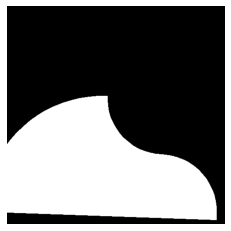

/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingData/shape/ksztalt45.bmp


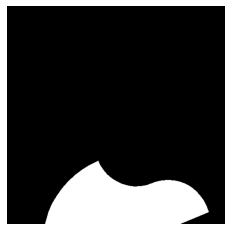

/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingData/triangle/trojkat1904.bmp


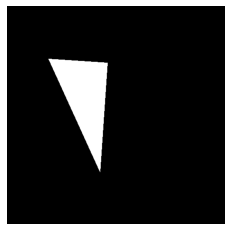

/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingData/triangle/trojkat69.bmp


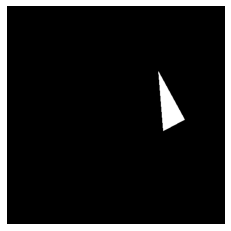

/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingData/wrench/trojkat491.bmp


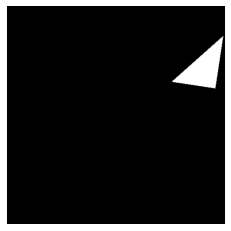

/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingData/wrench/trojkat278.bmp


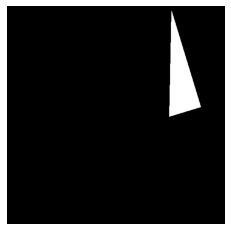

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_shape = [os.path.join(shape_dir, fname) 
                for fname in shape_files[pic_index-2:pic_index]]
next_triangle = [os.path.join(triangle_dir, fname) 
                for fname in triangle_files[pic_index-2:pic_index]]
next_wrench = [os.path.join(wrench_dir, fname) 
                for fname in wrench_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_shape+next_triangle+next_wrench):

  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TrainingData"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/TestData"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  #checkpoint_path = "model1/cp.ckpt"
  #checkpoint_dir = os.path.dirname(checkpoint_path)

  #cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True, werbose = 1)

  #history = model.fit(train_generator, epochs=1, steps_per_epoch=1, validation_data = validation_generator, verbose = 1, validation_steps=3,callbacks= [cp_callback])
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("ToolsClassifierModel.h5")


Found 1500 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 33, 33, 128)       147584    
______________________________________

In [4]:
# #Save Model
# #https://www.youtube.com/watch?v=HxtBIwfy0kM
# #model.save_weights('./checkpoints/my_checkpoint')
# #model.load_weights('./checkpoints/my_checkpoint')
# #!ls {checkpoint_dir}
# #to powinno zadzialac
# # Load Model
# import tensorflow as tf
# model = tf.keras.models.load_model('/content/drive/MyDrive/Colab/LearningBasic/ToolsImageClassification/rps.h5')

In [1]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

NameError: ignored

In [6]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving klucz1432.bmp to klucz1432.bmp
Saving klucz1624.bmp to klucz1624.bmp
Saving ksztalt106.bmp to ksztalt106.bmp
Saving ksztalt107.bmp to ksztalt107.bmp
Saving trojkat886.bmp to trojkat886.bmp
Saving trojkat889.bmp to trojkat889.bmp
klucz1432.bmp
[[0. 0. 1.]]
klucz1624.bmp
[[0. 0. 1.]]
ksztalt106.bmp
[[0. 0. 1.]]
ksztalt107.bmp
[[1. 0. 0.]]
trojkat886.bmp
[[0. 0. 1.]]
trojkat889.bmp
[[0. 0. 1.]]


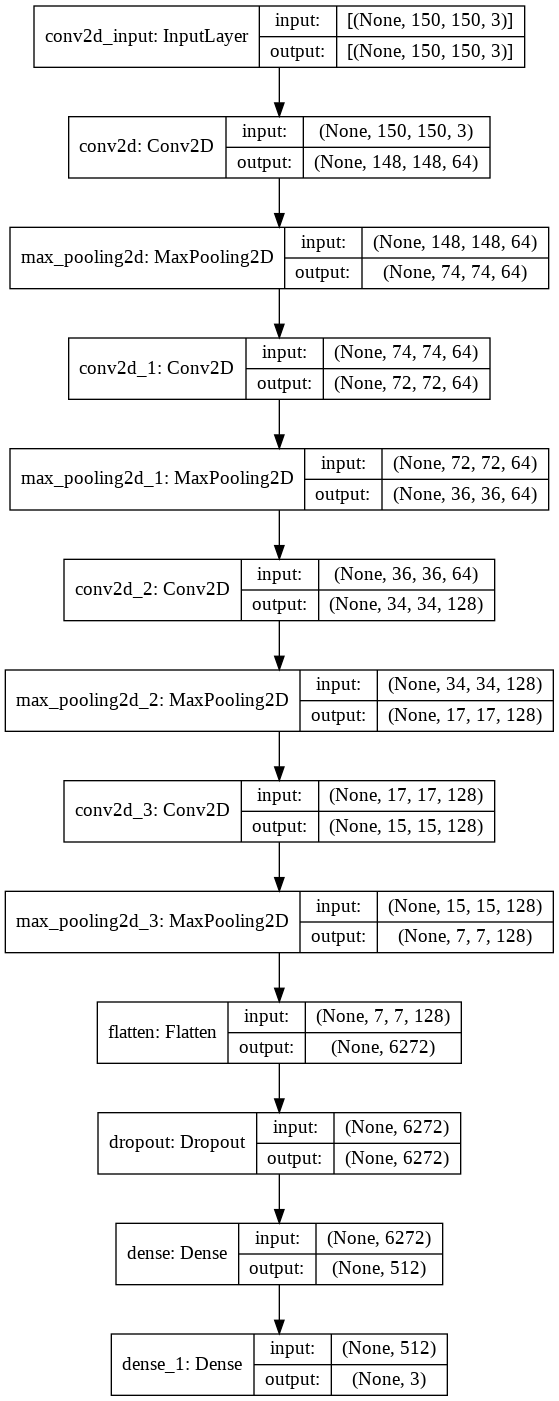

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)